# Business Case: LoanTap Logistic Regression

# Table of Contents
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem_Statement)
   1.  [Definition of problem](#Definition_of_problem)
3. [Summary Statistics](#Summary_Statistics)
    1. [Descriptive Statistics](#Descriptive_Statistics)
    2. [Class Distribution](#Class_Distribution)
    4. [Duplicate rows](#Duplicate_rows)
    5. [Outliers](#Outliers)
4. [Data Description](#DataDescription)
5. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [Numberical](#Numberical)
        1. [loan_amnt](#loan_amnt)
            1. [UnivariateAnalysis](#UnivariateAnalysis)  
            2. [BivaraiteAnalysis](#BivariateAnalysis)
        3. [int_rate](#int_rate) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_int_rate)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_int_rate)
        4. [installment](#installment) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_installment)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_installment)
        5. [annual_inc](#annual_inc) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_annual_inc)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_annual_inc)
        6. [revol_bal](#revol_bal) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_revol_bal)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_revol_bal)
        6. [revol_util](#revol_util) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_revol_util)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_revol_util)       
        6. [total_acc](#total_acc) 
            1. [UnivariateAnalysis](#UnivariateAnalysis_total_acc)  
            2. [BivaraiteAnalysis](#BivariateAnalysis_total_acc)    

    2. [Categorical](#Categorical)
        2. [BivaraiteAnalysis](#BivariateAnalysis)
            1. [term](#term) 
            2. [grade](#grade)
            3. [sub_grade](#sub_grade)
            4. [emp_title](#emp_title)    
            5. [emp_length](#emp_length)
            6. [home_ownership](#home_ownership)
            7. [verification_status](#verification_status)
            8. [issue_d](#issue_d)
            9. [purpose](#purpose)
            10. [title](#title)
            11. [open_acc](#open_acc)
            12. [pub_rec](#pub_rec)
            13. [initial_list_status](#initial_list_status)
            14. [application_type](#application_type)
            15. [mort_acc](#mort_acc)            
            16. [pub_rec_bankruptcies](#pub_rec_bankruptcies) 
            17. [address](#address)        
        

     
    2. [Correlation](#Correlation)
6. [Data Preprocessing](#Data_Preprocessing)

    2. [Missing value treatment](#Missing_value_treatment)
        1. [emp_title](#emp_title_handle_missing)
        2. [mort_acc](#mort_acc_handle_missing)
        3. [emp_length](#emp_length_handle_missing)
        4. [title](#title_handle_missing)
        5. [pub_rec_bankruptcies](#pub_rec_bankruptcies_handle_missing)
        
   
    3. [Outlier treatment](#Outlier_treatment)
    4. [Label Encoding](#Label_Encoding)
    5. [Data preparation for modeling](#Data_preparation_for_modeling)
7. [Model building](#Model_building)
    1. [Logistic Regression model](#Logistic_Regression_model)
        1. [model statistics](#model_statistics)
        2. [model coefficients with column names](#model_coefficients_with_column_names)
8. [Results Evaluation](#Results_Evaluation)
9. [ROC AUC Curve](#ROC_AUC_Curve)
    1. [comments](#ROC_AUC_Curve_comments)
10. [Precision Recall Curve](#Precision_Recall_Curve)
    1. [comments](#ROC_AUC_Curve_comments_comments)
11. [Classification Report](#Classification_Report)
    1. [Confusion Matrix](#Confusion_Matrix)
12. [Questions](#Questions)
    1. [Detection of real defaulters and less false positives](#Q1)
    2. [Dealing with NPA and loans disburse](#Q2)
    2. [Actionable Insights & Recommendations](#Q3)
    
    





 



### Introduction

**Context**:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

### Problem_Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from scipy.stats import shapiro
import scipy.stats as stats
import scipy.stats as stats
import statsmodels.api as sm

import statsmodels.api as sm
import statsmodels.formula.api as smf


from scipy.stats import f_oneway, ttest_ind, kruskal
from scipy.stats import chi2_contingency
import statsmodels.stats.multicomp as multi
from statsmodels.formula.api import ols

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [2]:
df = pd.read_csv("../data/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### DataDescription

- **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate** : Interest Rate on the loan
- **installment** : The monthly payment owed by the borrower if the loan originates.
- **grade** : LoanTap assigned loan grade
- **sub_grade** : LoanTap assigned loan subgrade
- **emp_title** :The job title supplied by the Borrower when applying for the loan.*
- **eemp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc** : The self-reported annual income provided by the borrower during registration.
- **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- **issue_d** : The month which the loan was funded

- **purpose** : A category provided by the borrower for the loan request.
- **title** : The loan title provided by the borrower
- **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
- **open_acc** : The number of open credit lines in the borrower's credit file.
- **pub_rec** : Number of derogatory public records
- **revol_bal** : Total credit revolving balance
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc** : The total number of credit lines currently in the borrower's credit file
- **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
- **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **mort_acc** : Number of mortgage accounts.
- **pub_rec_bankruptcies** : Number of public record bankruptcies
- **Address**: Address of the individual
- **loan_status**- : Current status of the loan - Target Variable

<center>
    
| Records | Features |
| :-- | :-- |
| 396030 | 27 |
  
<center>
    
| Class Distribution  | for loan_status |
| :-- | :-- |
| Fully Paid | 80.38 % |
| Charged Off| 19.61 % |
| **highly imbalanced** |



| Id | Features | type | About Feature|
| :-- | :--| :--|:--|
|01| **loan_amnt** | numeric| right-skewed, outliers(191 numbers / 0.05 %), p_value(0) < 0.05. Atleast one group has different mean **Important feature**|                                                                                              
|02| **int_rate** | numeric |right-skewed, outliers(3777 numbers / 0.95 %), Kruskal-Wallis:p_value(0) < 0.05. Atleast one group has different mean **Important feature**|
|03|**installment**|numeric|Mean: 431.85, Median: 375.43, right-skewed , outliers(11250  numbers / 2.84 %), p-value: 1.0878479597631045e-211 < 0.05, Atleast one group has different mean. **Important feature** |
|04|**annual_inc**|numeric|Mean: 74203.18 Median: 64000.0, right-skewed , outliers(16700   numbers /  4.22 %), Kruskal-Wallis : p-value: 0.0 < 0.05, Atleast one group has different mean. **Important feature** |
|05|**revol_bal**|numeric|Mean: 15844.54 Median: 11181.0, right-skewed , outliers(21259 numbers /  5.37 %), Kruskal-Wallis : p-value: 0.09 > 0.05, group has same mean. **Not Important feature** |
|06|**revol_util**|numeric| 
|07|**total_acc**|numeric|    
|08|**term**|categorical|
|09|**grade**|categorical|
|10|**sub_grade**|categorical|
|11|**emp_title**|categorical|
|12|**emp_length**|categorical|
|13|**home_ownership**|categorical|
|14|**verification_status**|categorical|
|15|**issue_d**|categorical|
|16|**purpose**|categorical|
|17|**title**|categorical|
|18|**open_acc**|categorical|
|19|**pub_rec**|categorical|
|20|**initial_list_status**|categorical|
|21|**application_type**|categorical|
|22|**mort_acc**|categorical|
|23|**pub_rec_bankruptcies**|categorical|
|24|**address**|categorical|
|25|**earliest_cr_line**|categorical|
          
    


    
    


### Summary_Statistics

#### Descriptive_Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Class_Distribution

**loan_status**

In [6]:
class_counts = df['loan_status'].value_counts()
class_percentages = df['loan_status'].value_counts(normalize=True) * 100
# Combine counts and percentages into a DataFrame
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print(f'Count and percentages of classes are: \n {class_distribution}')


Count and percentages of classes are: 
               Count  Percentage
Fully Paid   318357   80.387092
Charged Off   77673   19.612908


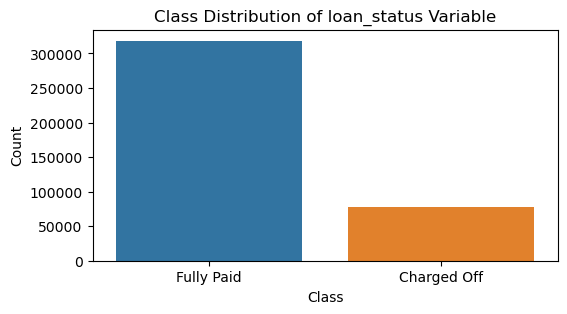

In [7]:
plt.figure(figsize=(6, 3))
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution of loan_status Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Interpretation**

* The target variable 'loan_status' is **imbalanced**, with : 
    * 80.38% of the instances belonging to the **'Fully Paid'** class and 
    * 19.61% to the **'Charged Off'** class.
* This significant class imbalance indicates that models trained on this data might be biased towards predicting the majority class ('Fully Paid').
* **Evaluation Metrics**: metrics that should be used for imbalanced datasets, such as **precision, recall, F1-score, and ROC-AUC, rather than accuracy**.

### Duplicate_rows

In [8]:
df.duplicated().sum()

0

<font color='blue' size=4>**Interpretation**</color>

* There are no dublicate rows, no handling is required

### Outliers

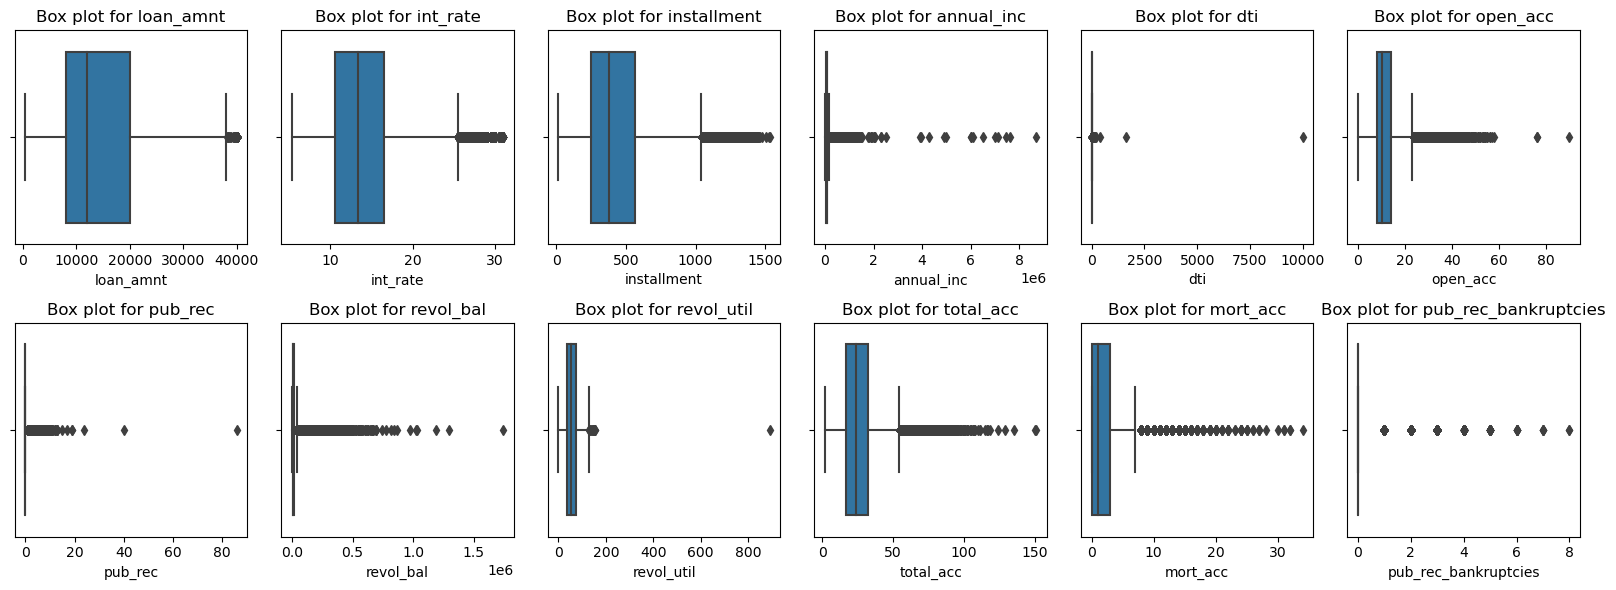

In [9]:
def detect_outliers_with_plots(data):
    """
    Detect outliers in each numerical feature of a dataset using the IQR method and plot box plots as subplots in four rows.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    
    Returns:
    pd.DataFrame: A DataFrame containing feature names, number of outliers, percentage of outliers, lower and upper boundaries.
    """
    # Calculate the number of numerical features
    numerical_features = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
    num_features = len(numerical_features)
    
    # Set up the figure and axes for subplots in four rows
    num_rows = 2
    num_cols = (num_features + num_rows - 1) // num_rows  # Calculate number of columns needed
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))  # Adjust figsize as needed
    
    # Initialize a list to store summary statistics
    summary_list = []
    
    # Iterate through numerical features
    for i, feature in enumerate(numerical_features):
        row = i // num_cols
        col = i % num_cols
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        num_outliers = len(outliers)
        total_count = len(data)
        percentage_outliers = (num_outliers / total_count) * 100
        
        # Plot box plot on the corresponding subplot
        sns.boxplot(x=data[feature], ax=axs[row, col])
        axs[row, col].set_title(f'Box plot for {feature}')
        axs[row, col].set_xlabel(feature)
        
        # Append summary statistics to the list
        summary_list.append({
            'Feature': feature,
            'Num_Outliers': num_outliers,
            'Percentage_Outliers': percentage_outliers,
            'Lower_Boundary': lower_bound,
            'Upper_Boundary': upper_bound,
        })
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
    # Return summary statistics as a DataFrame
    return pd.DataFrame(summary_list)


# Detect outliers and generate plots
summary_df = detect_outliers_with_plots(df)


In [10]:
def calculate_summary_statistics(data):
    """
    Calculate and return summary statistics for a numerical feature.
    
    """
    summary_stats = {
        'Mean': np.round(np.mean(data), 2),
        'Median': np.round(np.median(data), 2),
        'Standard Deviation': np.round(np.std(data), 2),
        'Min': np.min(data),
        'Max': np.max(data),
        '25th Percentile': np.percentile(data, 25),
        '75th Percentile': np.percentile(data, 75),
    }
    
    return summary_stats


def skewness_based_on_mean_median(data):
    """
    Calculate skewness based on mean and median.

    """
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    skewness = 3 * (mean_val - median_val) / np.std(data)
    print(f"Skewness based on mean and median: {np.round(skewness, 2)}")
    
    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    
    return skewness




In [11]:
def plot_distributions(data , col):
    plt.figure(figsize=(10,2), tight_layout=True)
    plt.subplot(1, 3, 1)
    sns.kdeplot(x=col, data=data)
    plt.title(f'kdeplot for {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=col, data=data)   
    
    plt.title(f'boxplot for {col}')

    ax3 = plt.subplot(1, 3, 3)
    #stats.probplot(data, dist="norm", plot=plt)
    sm.qqplot(data[col], line='s', ax=ax3)  # 's' indicates standardized line
    ax3.set_title(f'qqplot for {col}')
    plt.show()

In [12]:
def test_normality(dataframe, feature, alpha=0.05):

    H0 = f"{feature} is normally distributed"
    H1 = f"{feature} is not normally distributed"    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}")
    
    test_statistic, p_value = shapiro(dataframe[feature])
    print(f"Shapiro-Wilk Test Statistic: {test_statistic}")
    print(f"p-value: {p_value}")

    # Interpretation

    print(f"alpha = {alpha}")
    
    if p_value < alpha:
         print(f"Reject the null hypothesis as p_value '{p_value}' <  alpha '{alpha}' (data is not normally distributed).")        
    else:
        print(f"Fail to reject the null hypothesis  as p_value '{p_value}' > alpha '{alpha}' (data is normally distributed).")
        
        



def perform_tests_numerical_vs_target(df, numerical_feature, categorical_feature, test_type):
    """
    Perform t-test, ANOVA, or Kruskal-Wallis test based on the number of groups specified in test_dict.

    """
    groups = df[categorical_feature].unique()
    num_groups = len(groups)
        
    if test_type == 'ttest' and num_groups == 2:
        group1 = df[df[categorical_feature] == groups[0]][numerical_feature]
        group2 = df[df[categorical_feature] == groups[1]][numerical_feature]
        testresult = ttest_ind(group1, group2)
        result = f"T-test - T-statistic: {testresult.statistic}, p-value: {testresult.pvalue}"

    
    elif test_type == 'anova':
        grouped_data = [df[df[categorical_feature] == group][numerical_feature] for group in groups]
        testresult = f_oneway(*grouped_data)
        result = f"ANOVA - F-statistic: {testresult.statistic}, p-value: {testresult.pvalue}"
    
    elif test_type == 'kruskal':
        grouped_data = [df[df[categorical_feature] == group][numerical_feature] for group in groups]
        testresult = kruskal(*grouped_data)
        result = f"Kruskal-Wallis - H-statistic: {testresult.statistic}, p-value: {testresult.pvalue}"
    
    else:
        result = "No valid test specified for the given number of groups."
    
    print(result)
    
    return testresult


def bivariate_analysis_numerical_vs_categorical(data, numeric_feature , cat_target_variable, test):
    
    plt.figure(figsize=(6,3))
    sns.boxplot(x=cat_target_variable, y =numeric_feature, data=data)
    plt.title(f'Distribution of {cat_target_variable} for {numeric_feature}')
    plt.show()
    
    print(20*'***') 
    print(f'{test} : ')
    testresult = perform_tests_numerical_vs_target(df, numeric_feature, cat_target_variable, test)
    check_result(testresult.pvalue)
    print(20*'***') 
    


In [13]:
def detect_outliers_iqr(data, feature):
    """
    Detect outliers using the Interquartile Range (IQR) method.
    """

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers (indices where data is less than lower_bound or greater than upper_bound)
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    num_outliers = len(outliers)
    total_count = len(data)
    percentage_outliers = (num_outliers / total_count) * 100
    
    return (num_outliers, np.round(percentage_outliers, 2))


In [14]:
def summary_statistics_and_distribution(data, feature_name):
    print(20*'***') 
    print('summary_statistics:')
    print(20*'***') 
    stats = calculate_summary_statistics(data[feature_name])
    for key, value in stats.items():
        print(f"{key}: {value}")

    print(20*'***')    
    skewness_based_on_mean_median(data[feature_name])
    print(20*'***')  
    
    outliers = detect_outliers_iqr(data, feature_name)
    print(f'outliers : numbers = {outliers[0]} and percentage = {outliers[1]} %')
    print(20*'***')

    plot_distributions(data,feature_name)
    print(20*'***') 
    print("normality test: ")
    test_normality(data, feature_name)
    print(20*'***')
    
def check_result(pvalue):
    if pvalue < 0.05:
        print("Reject H0")
        print("Atleast one group has different mean")
    else:
        print("Fail to reject H0")
        print("All groups have same mean")

In [15]:
target_variable = 'loan_status'

## loan_amnt

- numberical feature
- right-skewed
- important to keep based on median difference against target variable

### UnivariateAnalysis

************************************************************
summary_statistics:
************************************************************
Mean: 14113.89
Median: 12000.0
Standard Deviation: 8357.43
Min: 500.0
Max: 40000.0
25th Percentile: 8000.0
75th Percentile: 20000.0
************************************************************
Skewness based on mean and median: 0.76
The distribution is right-skewed.
************************************************************
outliers : numbers = 191 and percentage = 0.05 %
************************************************************


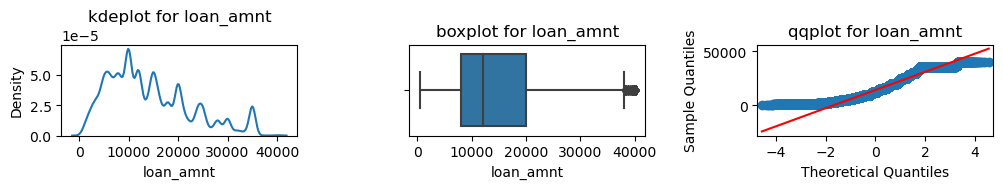

************************************************************
normality test: 
H0 : loan_amnt is normally distributed
H1 : loan_amnt is not normally distributed
Shapiro-Wilk Test Statistic: 0.9392586946487427
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
feature_name = 'loan_amnt'
summary_statistics_and_distribution(df, feature_name)

### BivariateAnalysis

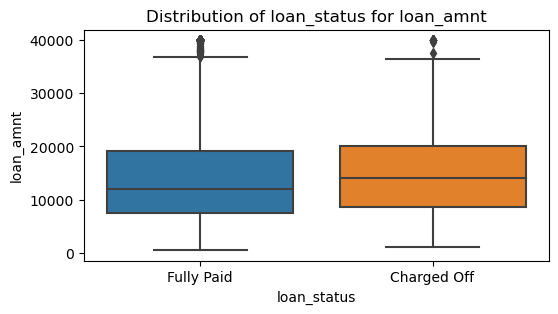

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 1559.441461895931, p-value: 0.0
Reject H0
Atleast one group has different mean
************************************************************


In [17]:
bivariate_analysis_numerical_vs_categorical(df, feature_name, target_variable, 'kruskal')

<font color='blue' size=4>**Interpretation**</color>
- there are notacible difference between the medians for class variables 'fully paid' and 'charged off'
    * So this variable is important
- both class variable has outliers, needs to be checked if to keep these outliers or not ?

## term
- categorical variable
- Mode :  36 months
- important for model building

In [18]:
def plot_distributions_categorical(data,feature_name):
  
    plt.figure(figsize=(6, 3), tight_layout=True)
    plt.subplot(1, 2, 1)
    df[feature_name].value_counts().plot(kind='bar')
    plt.title(f'"{feature_name}" Distribution')
    plt.xticks( rotation=90)

    plt.subplot(1, 2, 2)
    (df[feature_name].value_counts(normalize=True)*100).plot(kind='bar')
    plt.title(f'Frequency Dist for {feature_name} in %')
    plt.xticks( rotation=90)
    plt.show()

In [19]:
def statistics_and_freq_distribution(data, feature_name):

    print(20*'***')
    print(f"Unique Values: {data[feature].unique()}")
    mode_category = data[feature_name].mode()[0]
    print(f"Mode : {mode_category}")
    print(20*'***')
        
    plot_distributions_categorical(data, feature_name)

    print("Chi-Square test: ")
    chisqare_test(data, feature_name, target_variable)
    print(20*'***')


In [20]:
def chisqare_test(data, predictor, target):

    # Create contingency table
    contingency_table = pd.crosstab(data[predictor], data[target])

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    H0 = f"(H0): There is no association between [{predictor} and {target}]."
    H1 = f"(H1): There is an association between [{predictor}' and {target}]."
    print (H0)  
    print (H1)
    print('Chi-Square test statistic:', np.round(chi2, 2))
    print('p-value:', p)

    if p < 0.05:
        print(f'Reject the H0. There is significant association between "{predictor} and {target}" variables as p_value {p} <  aplha = 0.05')
    else:
        print(f'Fail to Reject H0, There is no association between "{predictor} and {target}" variable as p_value {p} > aplha = 0.05')


In [21]:
def eda_highCardinality_categorical_vs_categorical(data, high_card_feature, target_variable):

    # Display unique value counts of the high cardinality feature
    unique_counts = data[high_card_feature].value_counts()
    print(20*'***')  
    print("Unique value counts of the high cardinality feature:")
    print(unique_counts.head(10))

    # Get the top n unique values
    top_n_values = unique_counts.head(50).index
    df_top_n = data[data[high_card_feature].isin(top_n_values)]

    # Group by the high cardinality feature and target variable
    grouped = df_top_n.groupby([high_card_feature, target_variable]).size().unstack(fill_value=0)
    print(20*'***')  
    print("\nGrouped data (first 10 rows):")
    print(grouped.head(10))  

    # Chi-Square Test for Independence
    chi2, p, dof, ex = chi2_contingency(grouped)
    print(f"\nChi-Square Test: chi2 = {chi2}, p-value = {p}, degrees of freedom = {dof}")
    if p < 0.05:
        print("The high cardinality feature and target variable are dependent (reject H0).")
    else:
        print("The high cardinality feature and target variable are independent (fail to reject H0).")

### BivariateAnalysis_term

************************************************************
Unique Values: [' 36 months' ' 60 months']
Mode :  36 months
************************************************************


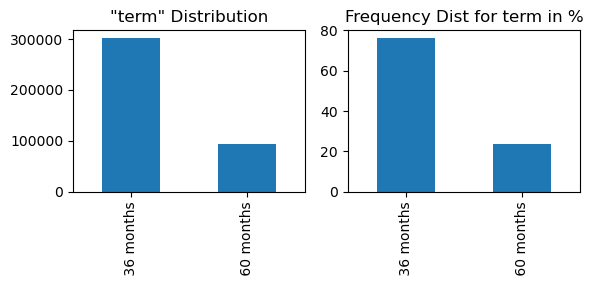

Chi-Square test: 
(H0): There is no association between [term and loan_status].
(H1): There is an association between [term' and loan_status].
Chi-Square test statistic: 11885.54
p-value: 0.0
Reject the H0. There is significant association between "term and loan_status" variables as p_value 0.0 <  aplha = 0.05
************************************************************


In [22]:
feature= 'term'
statistics_and_freq_distribution(df, feature)

<font color='blue' size=4>**Interpretation**</color>
- maximum loan is given for 36 months ~ 80%
- chisquare test suggest that this feature has a association with target_varible
    - so we keep this feature

## int_rate

- numberica data
- mean is not equal to median that mean skewed, its right skewed data

#### UnivariateAnalysis_int_rate

************************************************************
summary_statistics:
************************************************************
Mean: 13.64
Median: 13.33
Standard Deviation: 4.47
Min: 5.32
Max: 30.99
25th Percentile: 10.49
75th Percentile: 16.49
************************************************************
Skewness based on mean and median: 0.21
The distribution is right-skewed.
************************************************************
outliers : numbers = 3777 and percentage = 0.95 %
************************************************************


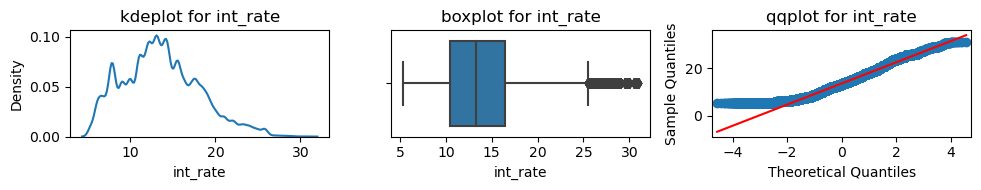

************************************************************
normality test: 
H0 : int_rate is normally distributed
H1 : int_rate is not normally distributed
Shapiro-Wilk Test Statistic: 0.982596755027771
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
feature_name = 'int_rate'
summary_statistics_and_distribution(df, feature_name)

#### BivariateAnalysis_int_rate

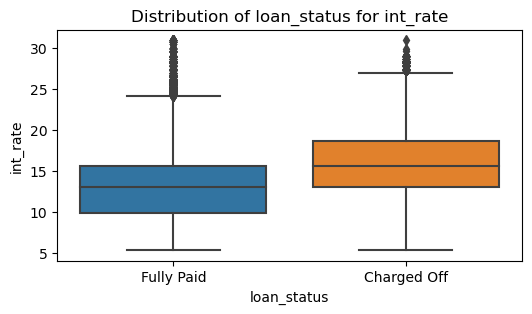

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 23684.80612332653, p-value: 0.0
Reject H0
Atleast one group has different mean
************************************************************


In [24]:
bivariate_analysis_numerical_vs_categorical(df, feature_name, target_variable, 'kruskal')

<font color='blue' size=4>**Interpretation**</color>
- there are notacible difference between the medians for class variables 'fully paid' and 'charged off' for int_rate
    * So this variable is important
- both class variable has outliers, needs to be checked if to keep these outliers or not ?

### installment

installment : The monthly payment owed by the borrower if the loan originates.

- numberical data

#### UnivariateAnalysis_installment

************************************************************
summary_statistics:
************************************************************
Mean: 431.85
Median: 375.43
Standard Deviation: 250.73
Min: 16.08
Max: 1533.81
25th Percentile: 250.33
75th Percentile: 567.3
************************************************************
Skewness based on mean and median: 0.68
The distribution is right-skewed.
************************************************************
outliers : numbers = 11250 and percentage = 2.84 %
************************************************************


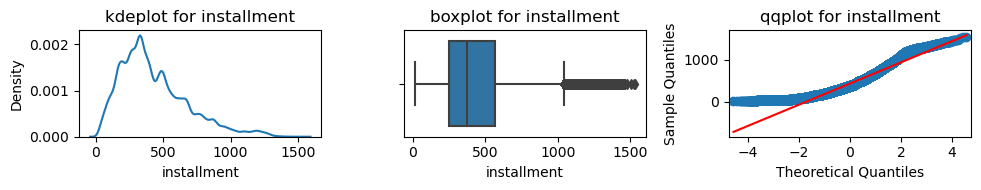

************************************************************
normality test: 
H0 : installment is normally distributed
H1 : installment is not normally distributed
Shapiro-Wilk Test Statistic: 0.9357084631919861
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
feature_name = 'installment'
summary_statistics_and_distribution(df, feature_name)

#### BivariateAnalysis_installment

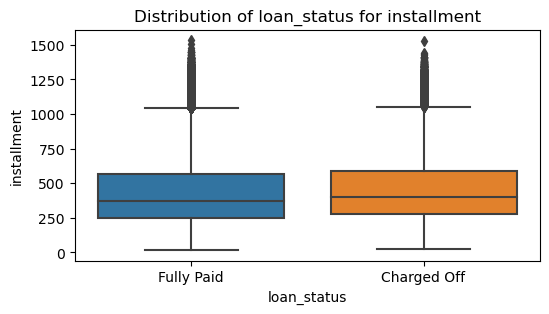

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 964.1975586238364, p-value: 1.0878479597631045e-211
Reject H0
Atleast one group has different mean
************************************************************


In [26]:
bivariate_analysis_numerical_vs_categorical(df, feature_name, target_variable, 'kruskal')

<font color='blue' size=4>**Interpretation**</color>
- test-statistic, p_values < 0.05. This indicates that the means of the two groups are significantly different.
    * This suggests that the categorical feature is important and should be considered in model building.
- both class variable has outliers

### grade

************************************************************
Unique Values: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Mode : B
************************************************************


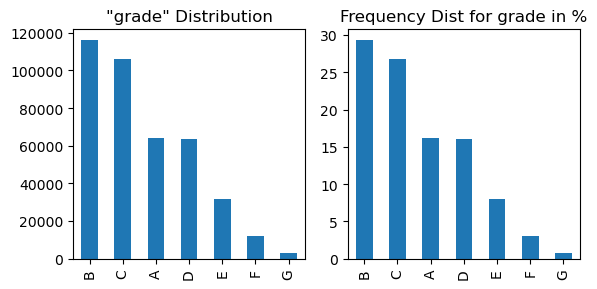

Chi-Square test: 
(H0): There is no association between [grade and loan_status].
(H1): There is an association between [grade' and loan_status].
Chi-Square test statistic: 26338.06
p-value: 0.0
Reject the H0. There is significant association between "grade and loan_status" variables as p_value 0.0 <  aplha = 0.05
************************************************************


In [27]:
feature= 'grade'
statistics_and_freq_distribution(df, feature)

### sub_grade

************************************************************
Unique Values: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
Mode : B3
************************************************************


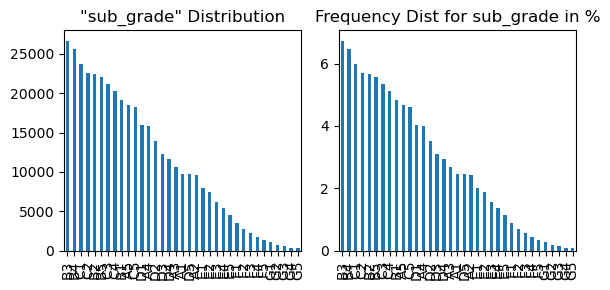

Chi-Square test: 
(H0): There is no association between [sub_grade and loan_status].
(H1): There is an association between [sub_grade' and loan_status].
Chi-Square test statistic: 27560.2
p-value: 0.0
Reject the H0. There is significant association between "sub_grade and loan_status" variables as p_value 0.0 <  aplha = 0.05
************************************************************


In [28]:
feature= 'sub_grade'
statistics_and_freq_distribution(df, feature)

### emp_title

In [29]:
print(df.emp_title.nunique())
eda_highCardinality_categorical_vs_categorical(df, 'emp_title', target_variable )

173105
************************************************************
Unique value counts of the high cardinality feature:
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status               Charged Off  Fully Paid
emp_title                                        
Account Executive                  79         323
Account Manager                   139         553
Accountant                        122         626
Administrative Assistant          163         593
Administrator                      64         313
Analyst                           107         516
Assistant Manager                  98         333
Attorney                           77         590
Branch 

### emp_length

11
************************************************************
Unique value counts of the high cardinality feature:
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
Name: emp_length, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status  Charged Off  Fully Paid
emp_length                          
1 year              5154       20728
10+ years          23215      102826
2 years             6924       28903
3 years             6182       25483
4 years             4608       19344
5 years             5092       21403
6 years             3943       16898
7 years             4055       16764
8 years             3829       15339
9 years             3070       12244

Chi-Square Test: chi2 = 122.11317384460878, p-value = 1.88404995201913e-21, degrees of freedom = 10
The high cardin

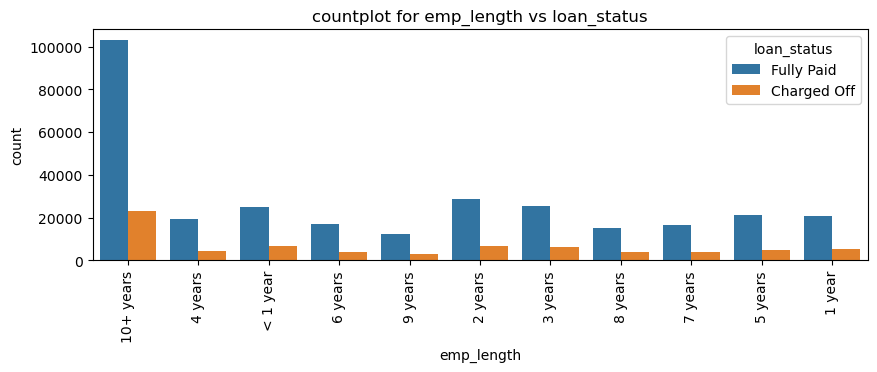

In [30]:
print(df.emp_length.nunique())
eda_highCardinality_categorical_vs_categorical(df, 'emp_length', target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x='emp_length', data=df, hue='loan_status')
plt.title(f'countplot for emp_length vs loan_status')
plt.xticks(rotation=90)
plt.show()

### home_ownership

unique counts : 6
************************************************************
Unique value counts of the high cardinality feature:
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status     Charged Off  Fully Paid
home_ownership                         
ANY                       0           3
MORTGAGE              33632      164716
NONE                      7          24
OTHER                    16          96
OWN                    7806       29940
RENT                  36212      123578

Chi-Square Test: chi2 = 1860.6350953584301, p-value = 0.0, degrees of freedom = 5
The high cardinality feature and target variable are dependent (reject H0).


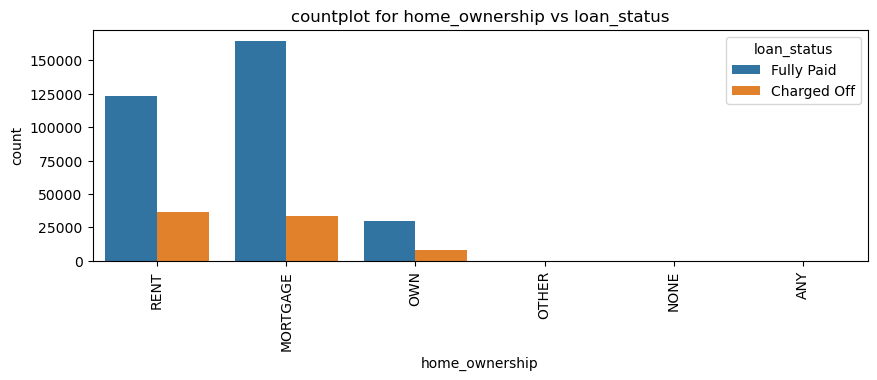

In [31]:
feature = 'home_ownership'
print(f'unique counts : {df[feature].nunique()}')
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### annual_inc

#### UnivariateAnalysis_annual_inc

************************************************************
summary_statistics:
************************************************************
Mean: 74203.18
Median: 64000.0
Standard Deviation: 61637.54
Min: 0.0
Max: 8706582.0
25th Percentile: 45000.0
75th Percentile: 90000.0
************************************************************
Skewness based on mean and median: 0.5
The distribution is right-skewed.
************************************************************
outliers : numbers = 16700 and percentage = 4.22 %
************************************************************


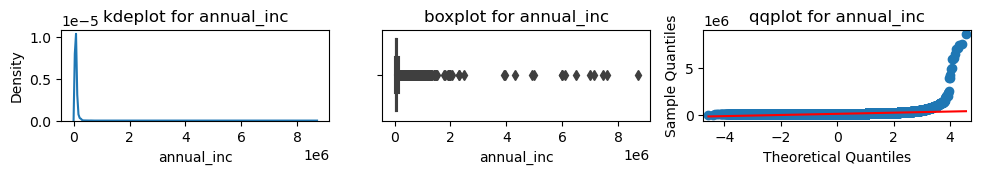

************************************************************
normality test: 
H0 : annual_inc is normally distributed
H1 : annual_inc is not normally distributed
Shapiro-Wilk Test Statistic: 0.46121877431869507
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
feature = 'annual_inc'
summary_statistics_and_distribution(df, feature)


#### BivariateAnalysis_annual_inc

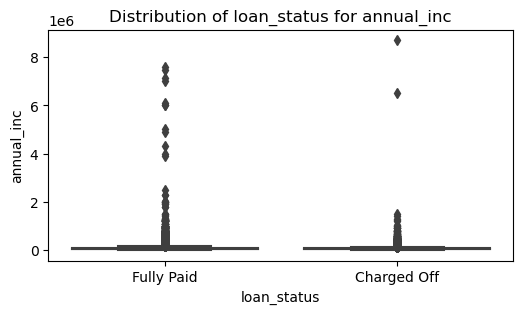

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 2945.6054924989753, p-value: 0.0
Reject H0
Atleast one group has different mean
************************************************************


In [33]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable, 'kruskal')

In [34]:
df.verification_status

0            Not Verified
1            Not Verified
2         Source Verified
3            Not Verified
4                Verified
               ...       
396025    Source Verified
396026    Source Verified
396027           Verified
396028           Verified
396029           Verified
Name: verification_status, Length: 396030, dtype: object

## verification_status

************************************************************
Unique Values: ['Not Verified' 'Source Verified' 'Verified']
Mode : Verified
************************************************************


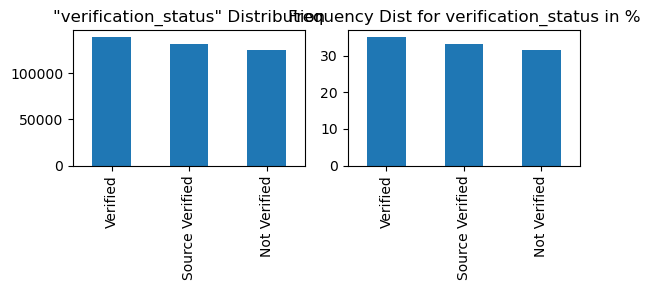

Chi-Square test: 
(H0): There is no association between [verification_status and loan_status].
(H1): There is an association between [verification_status' and loan_status].
Chi-Square test statistic: 2903.07
p-value: 0.0
Reject the H0. There is significant association between "verification_status and loan_status" variables as p_value 0.0 <  aplha = 0.05
************************************************************


In [35]:
feature= 'verification_status'
statistics_and_freq_distribution(df, feature)

### issue_d

In [36]:
df.issue_d.nunique()

115

115
************************************************************
Unique value counts of the high cardinality feature:
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Name: issue_d, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status  Charged Off  Fully Paid
issue_d                             
Apr-2012             396        2112
Apr-2013            1123        5847
Apr-2014            2050        6970
Apr-2015            2495        6975
Apr-2016             485        2542
Aug-2012             703        3517
Aug-2013            1417        7695
Aug-2014            1906        5954
Aug-2015            1746        5407
Dec-2012             688        3883

Chi-Square Test: chi2 = 3866.2413776298263, p-value = 0.0, degrees of freedom = 49
The high cardinality feature and target variable are d

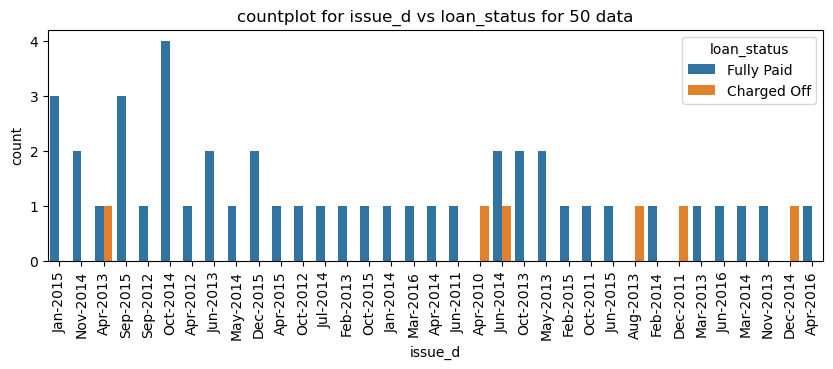

In [37]:
feature = 'issue_d'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df[:50], hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status for 50 data')
plt.xticks(rotation=90)
plt.show()

### purpose

14
************************************************************
Unique value counts of the high cardinality feature:
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
Name: purpose, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status         Charged Off  Fully Paid
purpose                                    
car                         633        4064
credit_card               13874       69145
debt_consolidation        48640      185867
educational                  42         215
home_improvement           4087       19943
house                       434        1767
major_purchase             1448        7342
medical                     911        3285
moving                      670  

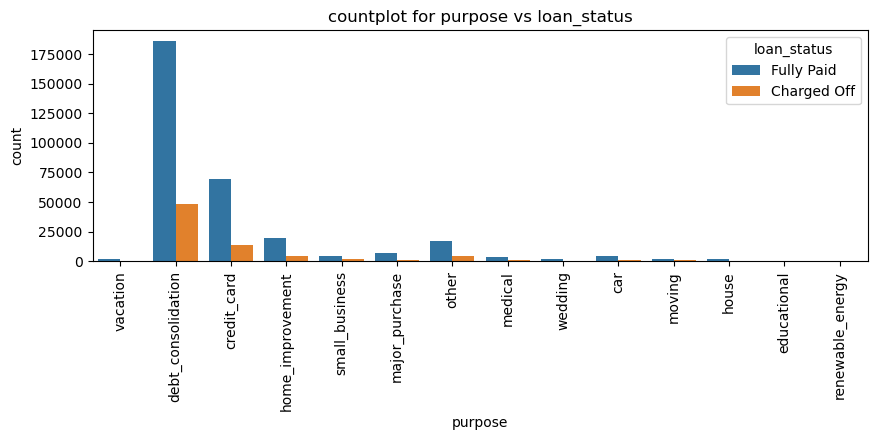

In [38]:
feature = 'purpose'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### title

48817
************************************************************
Unique value counts of the high cardinality feature:
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status                Charged Off  Fully Paid
title                                             
Business                           959        1990
Car financing                      352        1787
Consolidate                        141         778
Consolidation                      550        3302
Consolidation Loan                 163        1136
Credit Card                         54         393
Credit Card Co

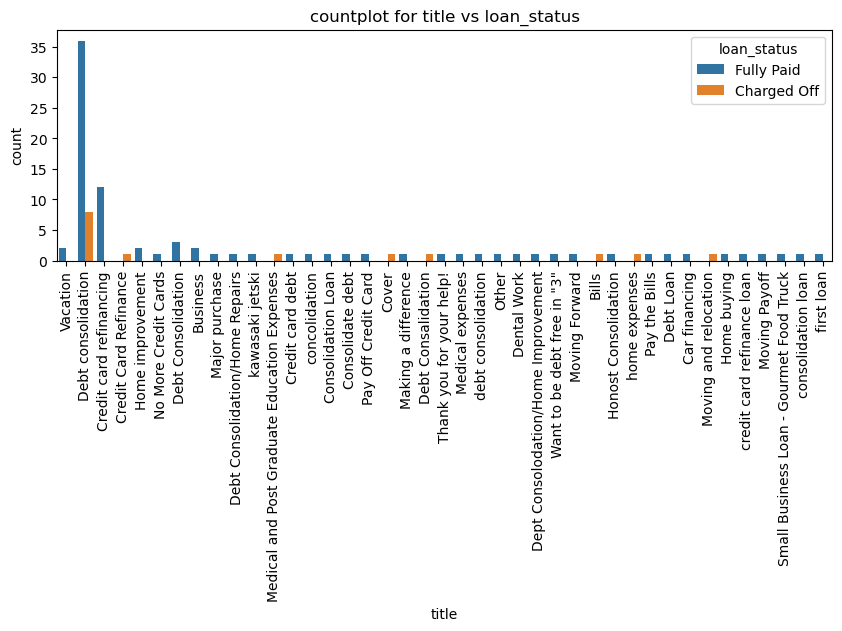

In [39]:
feature = 'title'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df[:100], hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

## dti

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

************************************************************
summary_statistics:
************************************************************
Mean: 17.38
Median: 16.91
Standard Deviation: 18.02
Min: 0.0
Max: 9999.0
25th Percentile: 11.28
75th Percentile: 22.98
************************************************************
Skewness based on mean and median: 0.08
The distribution is right-skewed.
************************************************************
outliers : numbers = 275 and percentage = 0.07 %
************************************************************


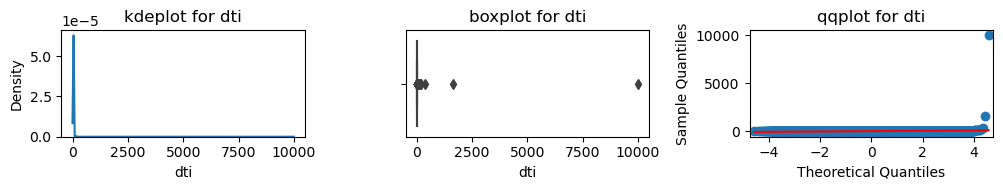

************************************************************
normality test: 
H0 : dti is normally distributed
H1 : dti is not normally distributed
Shapiro-Wilk Test Statistic: 0.20904600620269775
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
feature = 'dti'
summary_statistics_and_distribution(df, feature)

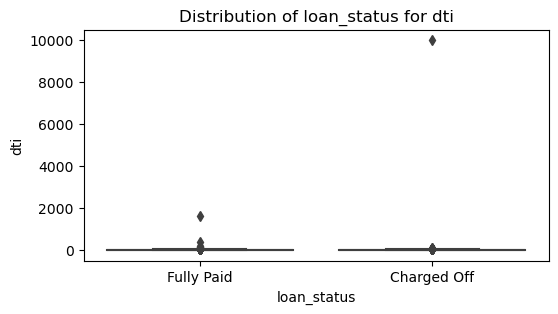

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 6467.646643302864, p-value: 0.0
Reject H0
Atleast one group has different mean
************************************************************


In [41]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable, 'kruskal')

### earliest_cr_line
earliest_cr_line :The month the borrower's earliest reported credit line was opened

684
************************************************************
Unique value counts of the high cardinality feature:
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
Oct-1999    2726
Nov-1999    2700
Sep-2000    2691
Oct-2002    2640
Aug-2002    2599
Name: earliest_cr_line, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status       Charged Off  Fully Paid
earliest_cr_line                         
Apr-2000                  391        1622
Apr-2001                  473        1634
Aug-1998                  408        1741
Aug-1999                  506        2042
Aug-2000                  569        2366
Aug-2001                  573        2311
Aug-2002                  513        2086
Aug-2003                  440        1829
Dec-1998                  425        1904
Dec-1999                  475        2004

Chi-Square Test: chi2 = 81.67282766728353, p-value = 0.002341293953584884, deg

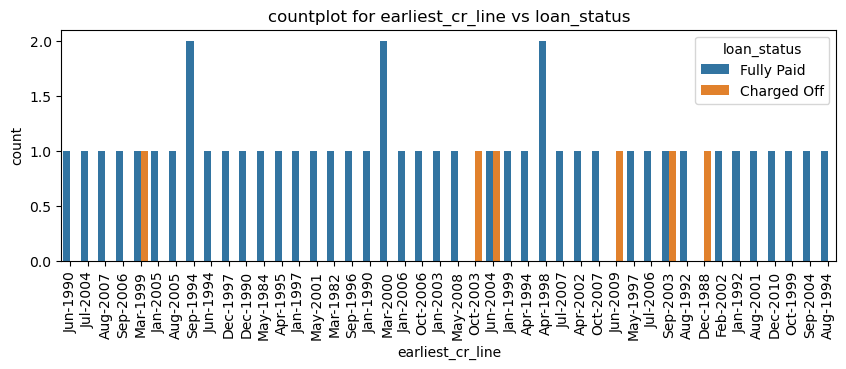

In [42]:
feature = 'earliest_cr_line'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df[:50], hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### open_acc
open_acc : The number of open credit lines in the borrower's credit file.

61
************************************************************
Unique value counts of the high cardinality feature:
9.0     36779
10.0    35441
8.0     35137
11.0    32695
7.0     31328
12.0    29157
6.0     25927
13.0    24983
14.0    21173
5.0     18308
Name: open_acc, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status  Charged Off  Fully Paid
open_acc                            
1.0                   15          70
2.0                  277        1182
3.0                  850        3933
4.0                 1921        8788
5.0                 3290       15018
6.0                 4725       21202
7.0                 5757       25571
8.0                 6544       28593
9.0                 7034       29745
10.0                6994       28447

Chi-Square Test: chi2 = 360.25946417312923, p-value = 5.455962628243132e-49, degrees of freedom = 49
The high cardinality feature and target variable are dependent (reject H0).


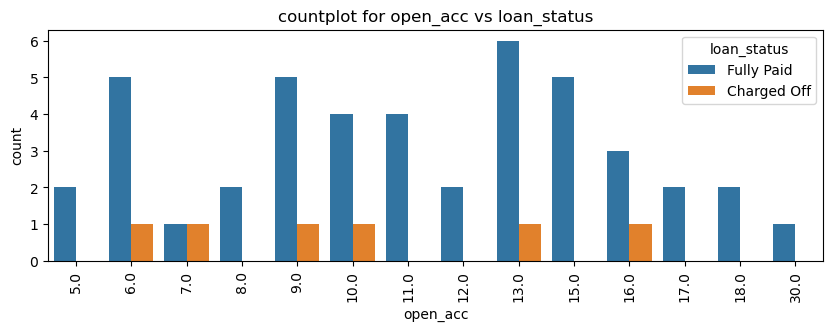

In [43]:
feature = 'open_acc'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df[:50], hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### pub_rec

pub_rec : Number of derogatory public records

20
************************************************************
Unique value counts of the high cardinality feature:
0.0    338272
1.0     49739
2.0      5476
3.0      1521
4.0       527
5.0       237
6.0       122
7.0        56
8.0        34
9.0        12
Name: pub_rec, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status  Charged Off  Fully Paid
pub_rec                             
0.0                65339      272933
1.0                10469       39270
2.0                 1254        4222
3.0                  340        1181
4.0                  145         382
5.0                   56         181
6.0                   31          91
7.0                   16          40
8.0                    6          28
9.0                    5           7

Chi-Square Test: chi2 = 195.1034353105139, p-value = 3.1977870014319198e-31, degrees of freedom = 19
The high cardinality feature and target variable are dependent (reject H0).


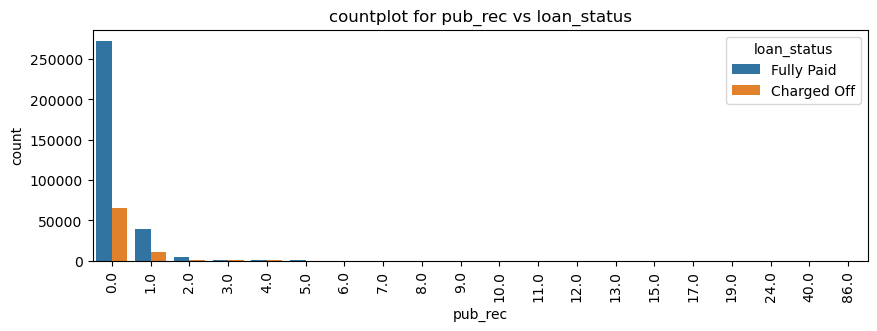

In [44]:
feature = 'pub_rec'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(10, 3))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

<font color='blue'>Observations </font>:
* This feature is <font color='green'>is important </font> target variable is dependent on this.

### revol_bal

revol_bal : Total credit revolving balance

In [45]:
df['revol_bal'].nlargest(5)

118582    1743266.0
244156    1298783.0
53563     1190046.0
119450    1030826.0
255310    1023940.0
Name: revol_bal, dtype: float64

### UnivariateAnalysis_revol_bal

************************************************************
summary_statistics:
************************************************************
Mean: 15844.54
Median: 11181.0
Standard Deviation: 20591.81
Min: 0.0
Max: 1743266.0
25th Percentile: 6025.0
75th Percentile: 19620.0
************************************************************
Skewness based on mean and median: 0.68
The distribution is right-skewed.
************************************************************
outliers : numbers = 21259 and percentage = 5.37 %
************************************************************


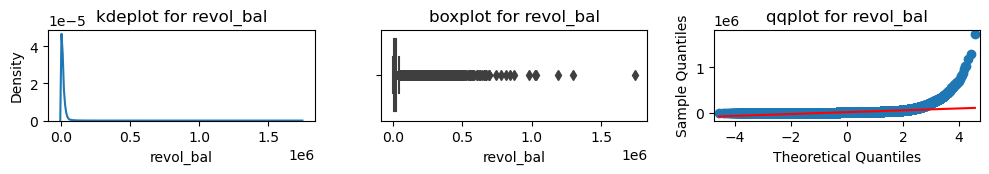

************************************************************
normality test: 
H0 : revol_bal is normally distributed
H1 : revol_bal is not normally distributed
Shapiro-Wilk Test Statistic: 0.4984705448150635
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
feature = 'revol_bal'
summary_statistics_and_distribution(df, feature )

### BivariateAnalysis_revol_bal

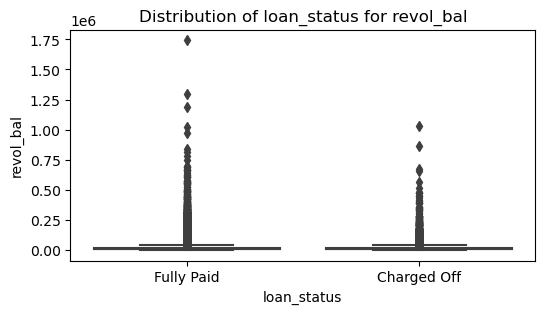

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 2.8250079804767285, p-value: 0.09280643097612803
Fail to reject H0
All groups have same mean
************************************************************


In [47]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable,'kruskal')

<font color='blue'>Observations </font>:
* This feature is <font color='red'>not important </font> as groups has same mean

### revol_util
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

#### UnivariateAnalysis_revol_util

************************************************************
summary_statistics:
************************************************************
Mean: 53.79
Median: nan
Standard Deviation: 24.45
Min: 0.0
Max: 892.3
25th Percentile: nan
75th Percentile: nan
************************************************************
Skewness based on mean and median: nan
The distribution is approximately symmetric.
************************************************************
outliers : numbers = 0 and percentage = 0.0 %
************************************************************


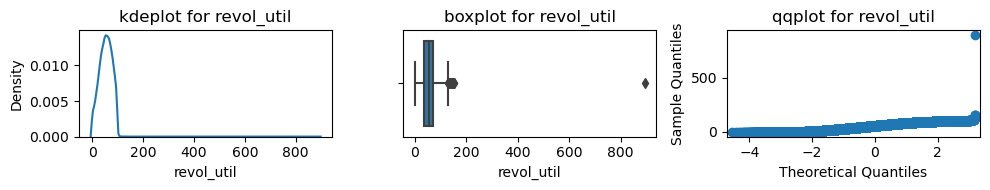

************************************************************
normality test: 
H0 : revol_util is normally distributed
H1 : revol_util is not normally distributed
Shapiro-Wilk Test Statistic: nan
p-value: 1.0
alpha = 0.05
Fail to reject the null hypothesis  as p_value '1.0' > alpha '0.05' (data is normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
feature = 'revol_util'
summary_statistics_and_distribution(df, feature )

#### BivariateAnalysis_revol_util

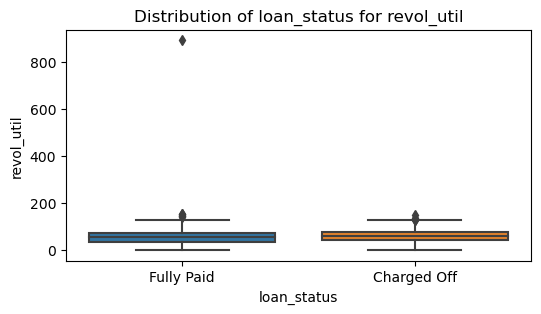

************************************************************
anova : 
ANOVA - F-statistic: nan, p-value: nan
Fail to reject H0
All groups have same mean
************************************************************


In [49]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable,'anova')

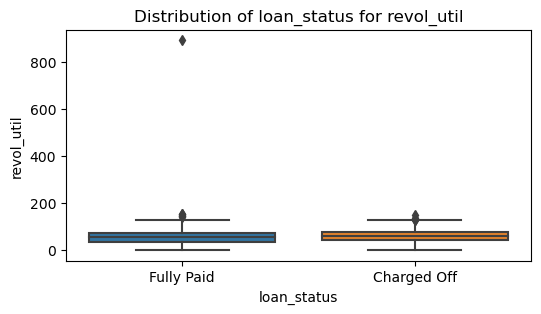

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: nan, p-value: nan
Fail to reject H0
All groups have same mean
************************************************************


In [50]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable,'kruskal')

<font color='blue'>Observations </font>:
* This feature is <font color='red'>not important </font> as groups has same mean

### total_acc

In [51]:
df.total_acc

0         25.0
1         27.0
2         26.0
3         13.0
4         43.0
          ... 
396025    23.0
396026     8.0
396027    23.0
396028    20.0
396029    19.0
Name: total_acc, Length: 396030, dtype: float64

#### UnivariateAnalysis_total_acc

************************************************************
summary_statistics:
************************************************************
Mean: 25.41
Median: 24.0
Standard Deviation: 11.89
Min: 2.0
Max: 151.0
25th Percentile: 17.0
75th Percentile: 32.0
************************************************************
Skewness based on mean and median: 0.36
The distribution is right-skewed.
************************************************************
outliers : numbers = 8499 and percentage = 2.15 %
************************************************************


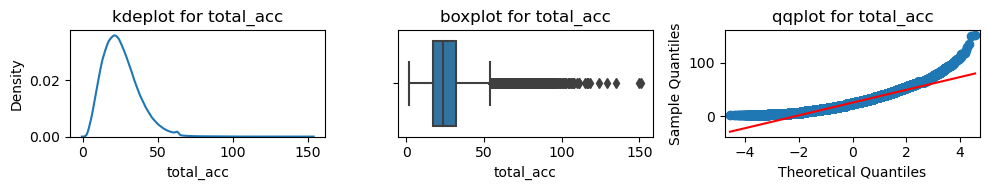

************************************************************
normality test: 
H0 : total_acc is normally distributed
H1 : total_acc is not normally distributed
Shapiro-Wilk Test Statistic: 0.9599084854125977
p-value: 0.0
alpha = 0.05
Reject the null hypothesis as p_value '0.0' <  alpha '0.05' (data is not normally distributed).
************************************************************


C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
feature = 'total_acc'
summary_statistics_and_distribution(df, feature )

#### BivariateAnalysis_total_acc

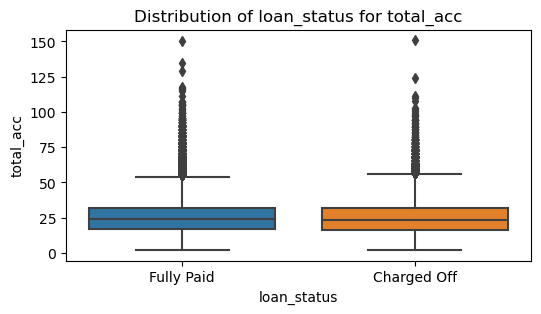

************************************************************
kruskal : 
Kruskal-Wallis - H-statistic: 169.26173993580815, p-value: 1.0725359453336761e-38
Reject H0
Atleast one group has different mean
************************************************************


In [53]:
bivariate_analysis_numerical_vs_categorical(df, feature, target_variable,'kruskal')

<font color='blue'>Observations </font>:
* This feature is <font color='green'>is important </font> as groups has  different mean.

### initial_list_status

2
************************************************************
Unique value counts of the high cardinality feature:
f    238066
w    157964
Name: initial_list_status, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status          Charged Off  Fully Paid
initial_list_status                         
f                          45961      192105
w                          31712      126252

Chi-Square Test: chi2 = 35.61125549485254, p-value = 2.408916483118551e-09, degrees of freedom = 1
The high cardinality feature and target variable are dependent (reject H0).


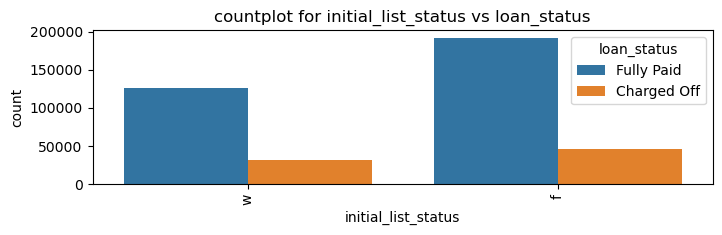

In [54]:
feature = 'initial_list_status'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(8, 2))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### application_type

3
************************************************************
Unique value counts of the high cardinality feature:
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status       Charged Off  Fully Paid
application_type                         
DIRECT_PAY                102         184
INDIVIDUAL              77517      317802
JOINT                      54         371

Chi-Square Test: chi2 = 59.601902791548355, p-value = 1.1418557766942247e-13, degrees of freedom = 2
The high cardinality feature and target variable are dependent (reject H0).


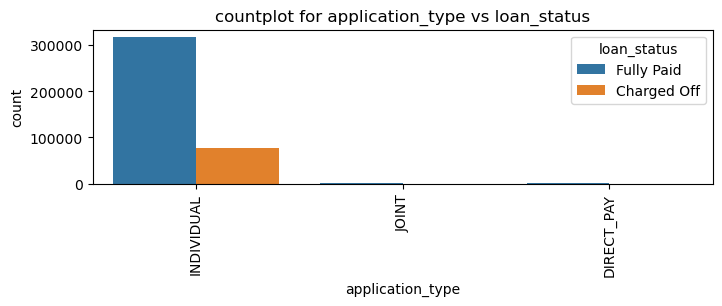

In [55]:
feature = 'application_type'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(8, 2))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### mort_acc

33
************************************************************
Unique value counts of the high cardinality feature:
0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
5.0     18194
6.0     11069
7.0      6052
8.0      3121
9.0      1656
Name: mort_acc, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status  Charged Off  Fully Paid
mort_acc                            
0.0                33157      106620
1.0                12122       48294
2.0                 9297       40651
3.0                 6535       31514
4.0                 4615       23272
5.0                 2858       15336
6.0                 1721        9348
7.0                  897        5155
8.0                  443        2678
9.0                  209        1447

Chi-Square Test: chi2 = 2302.124710409491, p-value = 0.0, degrees of freedom = 32
The high cardinality feature and target variable are dependent (reject H0).


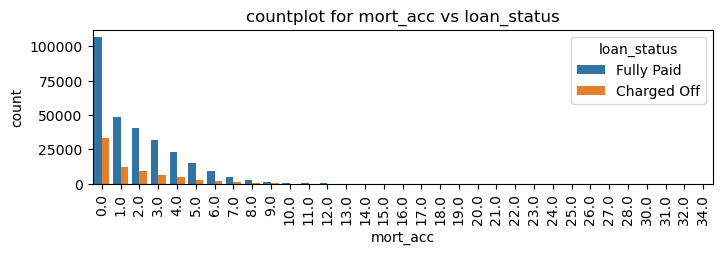

In [56]:
feature = 'mort_acc'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(8, 2))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### pub_rec_bankruptcies
pub_rec_bankruptcies : Number of public record bankruptcies

9
************************************************************
Unique value counts of the high cardinality feature:
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                         68321      282059
1.0                          8727       34063
2.0                           429        1418
3.0                            74         277
4.0                            26          56
5.0                             5          27
6.0                             2           5
7.0                             1           3
8.0                             1           1

Chi-Square Test: chi2 = 44.77652714609038, p-value = 4.056824231550618e-07, degrees of freedom = 8
The high cardinalit

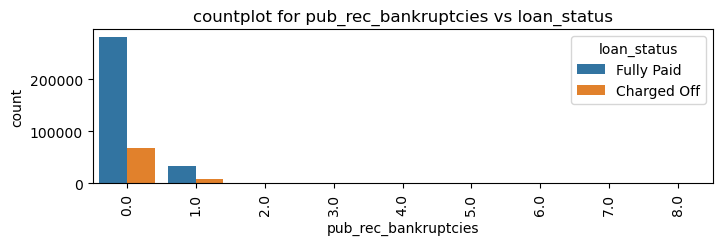

In [57]:
feature = 'pub_rec_bankruptcies'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(8, 2))
sns.countplot(x=feature, data=df, hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

### address

In [58]:
df.address

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

393700
************************************************************
Unique value counts of the high cardinality feature:
USCGC Smith\r\nFPO AE 70466     8
USS Johnson\r\nFPO AE 48052     8
USNS Johnson\r\nFPO AE 05113    8
USS Smith\r\nFPO AP 70466       8
USNS Johnson\r\nFPO AP 48052    7
USNV Smith\r\nFPO AA 00813      6
USCGC Smith\r\nFPO AA 70466     6
USCGC Jones\r\nFPO AE 22690     6
USNS Johnson\r\nFPO AA 70466    6
USNV Smith\r\nFPO AE 30723      6
Name: address, dtype: int64
************************************************************

Grouped data (first 10 rows):
loan_status                   Charged Off  Fully Paid
address                                              
USCGC Brown\r\nFPO AA 30723             0           5
USCGC Jones\r\nFPO AE 22690             3           3
USCGC Jones\r\nFPO AE 30723             1           4
USCGC Lee\r\nFPO AA 22690               1           4
USCGC Miller\r\nFPO AA 22690            0           6
USCGC Smith\r\nFPO AA 29597             0

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


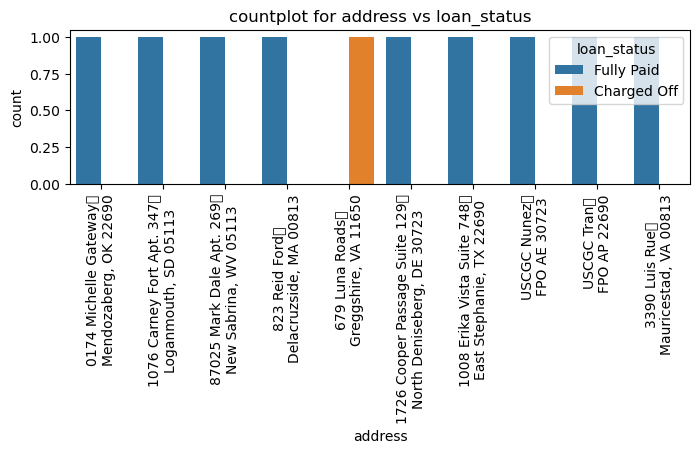

In [59]:
feature = 'address'
print(df[feature].nunique())
eda_highCardinality_categorical_vs_categorical(df, feature, target_variable )
plt.figure(figsize=(8, 2))
sns.countplot(x=feature, data=df[:10], hue='loan_status')
plt.title(f'countplot for {feature} vs loan_status')
plt.xticks(rotation=90)
plt.show()

## Data_Preprocessing

#### Missing_value_treatment

Text(0.5, 1.0, 'missing % of features values')

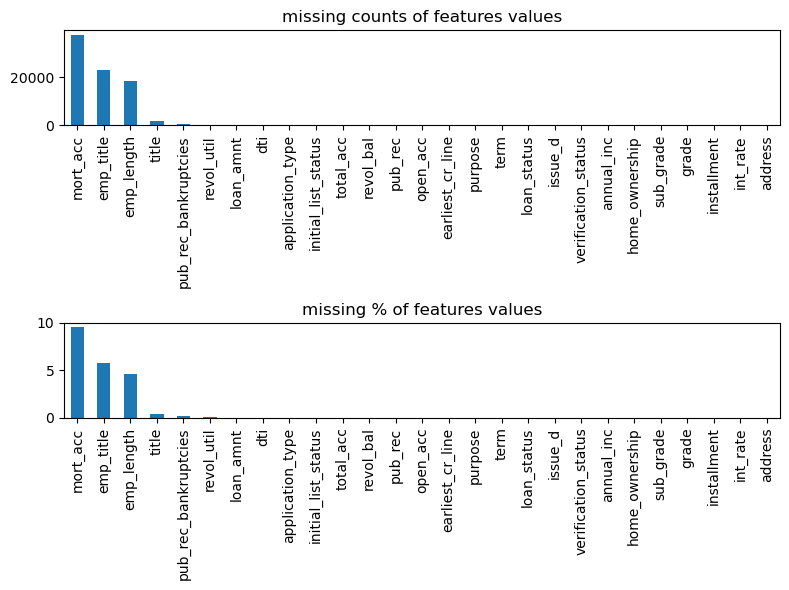

In [60]:
count_missing_values = df.isnull().sum()
per_missing_values = np.round(df.isnull().sum()/len(df) * 100, 2)

df_missing = pd.DataFrame({
    'missingCounts': count_missing_values,
    'missingPercentage': per_missing_values
})
df_missing.sort_values(by = 'missingCounts', ascending=False).head(10)

plt.figure(figsize=(8,6), tight_layout=True)
ax1 = plt.subplot(2, 1, 1)
df_missing.sort_values(by='missingCounts', ascending=False)['missingCounts'].plot(kind='bar')
ax1.set_title('missing counts of features values')

ax2 = plt.subplot(2, 1, 2)
df_missing.sort_values(by='missingPercentage', ascending=False)['missingPercentage'].plot(kind='bar')
ax2.set_title('missing % of features values')

**Interpretation**
* Follwing features has % of missing values: 
    * mort_acc		= 9.54
    * emp_title		= 5.79
    * emp_length	= 4.62
    * title	1756	= 0.44
    * pub_rec_bankruptcies	= 	0.14
    * revol_util	= 0.07
    
* Above features needs to be handled during features Engineering using methods like **Mean/Median/Mode Imputation**

### emp_title_handle_missing

In [61]:
df.emp_title.isna().sum()

22927

In [62]:
# get the unique values of another feature 'home_ownership' when emp_title is null
df[df.emp_title.isna()]['home_ownership'].value_counts()

MORTGAGE    10958
RENT         8049
OWN          3911
OTHER           5
NONE            2
ANY             2
Name: home_ownership, dtype: int64

In [63]:
# find the mode value 'emp_title' corresponding to  'home_ownership'
dict_h_ownshp_4Nulls = {}
for h_ownshp in df[df.emp_title.isna()]['home_ownership'].unique():
    dict_h_ownshp_4Nulls[h_ownshp] = df[df['home_ownership'] ==h_ownshp]['emp_title'].mode()[0]
    

In [64]:
dict_h_ownshp_4Nulls

{'RENT': 'Manager',
 'MORTGAGE': 'Teacher',
 'OWN': 'Teacher',
 'NONE': 'Advanced Biotech',
 'OTHER': 'AAR',
 'ANY': 'General Manager'}

In [65]:
df[df.emp_title.isna() & (df.home_ownership == 'RENT')]['emp_title'].head(3) 

35    NaN
36    NaN
99    NaN
Name: emp_title, dtype: object

In [66]:
 # replace null with 'Manager'
df.loc[df.emp_title.isna() & (df.home_ownership == 'RENT'), 'emp_title'] = dict_h_ownshp_4Nulls['RENT']

In [67]:
# like wise null with 'Teacher' if home_ownership is MORTGAGE 
for key in dict_h_ownshp_4Nulls.keys():
    df.loc[df.emp_title.isna() & (df.home_ownership == key), 'emp_title'] = dict_h_ownshp_4Nulls[key]

### mort_acc_handle_missing

In [68]:
df['mort_acc'].isna().sum()

37795

In [69]:
df[df['mort_acc'].isna()]['home_ownership'].value_counts()

RENT        18106
MORTGAGE    16642
OWN          2967
OTHER          78
NONE            2
Name: home_ownership, dtype: int64

In [70]:
mapdict = {}
for h_ownshp in df[df['mort_acc'].isna()]['home_ownership'].unique():
    mapdict[h_ownshp] = (df[df['home_ownership'] == h_ownshp]['mort_acc'].mode()[0])
    
print(mapdict)

for key in mapdict.keys():
    df.loc[df['mort_acc'].isna() & (df['home_ownership'] == key), 'mort_acc'] = mapdict[key]

{'OWN': 0.0, 'RENT': 0.0, 'MORTGAGE': 1.0, 'NONE': 0.0, 'OTHER': 0.0}


In [71]:
df['mort_acc'].isna().sum()

0

### emp_length_handle_missing

In [72]:
featurewithnulls = 'emp_length'
print(f'before impute null values {df[featurewithnulls].isna().sum()}')
df[df[featurewithnulls].isna()]['home_ownership'].value_counts()

mapdict = {}
for h_ownshp in df[df[featurewithnulls].isna()]['home_ownership'].unique():
    mapdict[h_ownshp] = (df[df['home_ownership'] == h_ownshp][featurewithnulls].mode()[0])
    
print(mapdict)

for key in mapdict.keys():
    df.loc[df[featurewithnulls].isna() & (df['home_ownership'] == key), featurewithnulls] = mapdict[key]

print(f'after impute null values {df[featurewithnulls].isna().sum()}')

before impute null values 18301
{'RENT': '10+ years', 'MORTGAGE': '10+ years', 'OWN': '10+ years', 'OTHER': '10+ years', 'NONE': '10+ years'}
after impute null values 0


### title_handle_missing

In [73]:
featurewithnulls = 'title'
print(f'{featurewithnulls} : before impute null values {df[featurewithnulls].isna().sum()}')
df[df[featurewithnulls].isna()]['home_ownership'].value_counts()

mapdict = {}
for h_ownshp in df[df[featurewithnulls].isna()]['home_ownership'].unique():
    mapdict[h_ownshp] = (df[df['home_ownership'] == h_ownshp][featurewithnulls].mode()[0])
    
print(mapdict)

for key in mapdict.keys():
    df.loc[df[featurewithnulls].isna() & (df['home_ownership'] == key), featurewithnulls] = mapdict[key]

print(f'{featurewithnulls} : after impute null values {df[featurewithnulls].isna().sum()}')

title : before impute null values 1755
{'RENT': 'Debt consolidation', 'MORTGAGE': 'Debt consolidation', 'OWN': 'Debt consolidation'}
title : after impute null values 0


### pub_rec_bankruptcies_handle_missing

In [74]:
featurewithnulls = 'pub_rec_bankruptcies'
print(f'{featurewithnulls} : before impute null values {df[featurewithnulls].isna().sum()}')
df[df[featurewithnulls].isna()]['home_ownership'].value_counts()

mapdict = {}
for h_ownshp in df[df[featurewithnulls].isna()]['home_ownership'].unique():
    mapdict[h_ownshp] = (df[df['home_ownership'] == h_ownshp][featurewithnulls].mode()[0])
    
print(mapdict)

for key in mapdict.keys():
    df.loc[df[featurewithnulls].isna() & (df['home_ownership'] == key), featurewithnulls] = mapdict[key]

print(f'{featurewithnulls} : after impute null values {df[featurewithnulls].isna().sum()}')

pub_rec_bankruptcies : before impute null values 535
{'RENT': 0.0, 'OWN': 0.0, 'MORTGAGE': 0.0, 'NONE': 0.0}
pub_rec_bankruptcies : after impute null values 0


### revol_util_handle_missing

In [75]:
featurewithnulls = 'revol_util'
print(f'{featurewithnulls} : before impute null values {df[featurewithnulls].isna().sum()}')
df[df[featurewithnulls].isna()]['home_ownership'].value_counts()

mapdict = {}
for h_ownshp in df[df[featurewithnulls].isna()]['home_ownership'].unique():
    mapdict[h_ownshp] = (df[df['home_ownership'] == h_ownshp][featurewithnulls].mode()[0])
    
print(mapdict)

for key in mapdict.keys():
    df.loc[df[featurewithnulls].isna() & (df['home_ownership'] == key), featurewithnulls] = mapdict[key]

print(f'{featurewithnulls} : after impute null values {df[featurewithnulls].isna().sum()}')

revol_util : before impute null values 276
{'MORTGAGE': 0.0, 'RENT': 0.0, 'OWN': 0.0, 'OTHER': 0.0}
revol_util : after impute null values 0


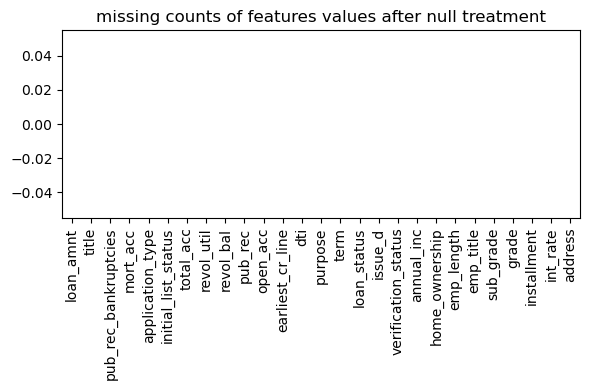

In [76]:
count_missing_values = df.isnull().sum()
per_missing_values = np.round(df.isnull().sum()/len(df) * 100, 2)

df_missing = pd.DataFrame({
    'missingCounts': count_missing_values,
    'missingPercentage': per_missing_values
})
df_missing.sort_values(by = 'missingCounts', ascending=False).head(10)

plt.figure(figsize=(6,4), tight_layout=True)
df_missing.sort_values(by='missingCounts', ascending=False)['missingCounts'].plot(kind='bar')
plt.title('missing counts of features values after null treatment')
plt.show()


### Outlier_treatment

In [77]:
df.isna().sum().sum()

0

In [78]:
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_out

def cap_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df




In [79]:
numeric_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 	'revol_util', 	'total_acc']


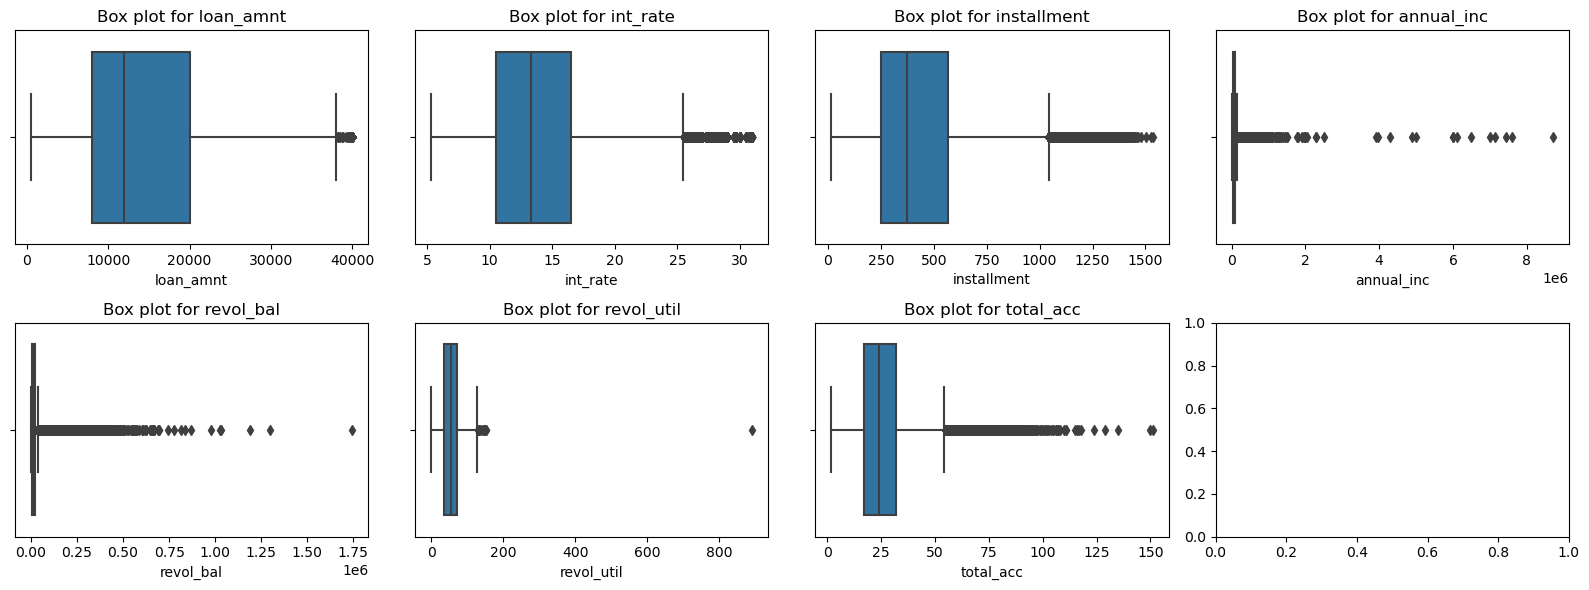

             Num_Outliers  Percentage_Outliers  Lower_Boundary  Upper_Boundary
Feature                                                                       
revol_bal           21259             5.368028      -14367.500       40012.500
annual_inc          16700             4.216852      -22500.000      157500.000
installment         11250             2.840694        -225.125        1042.755
total_acc            8499             2.146050          -5.500          54.500
int_rate             3777             0.953716           1.490          25.490
loan_amnt             191             0.048229      -10000.000       38000.000
revol_util             12             0.003030         -19.850         128.550


Text(0.5, 1.0, '% of outliers for features')

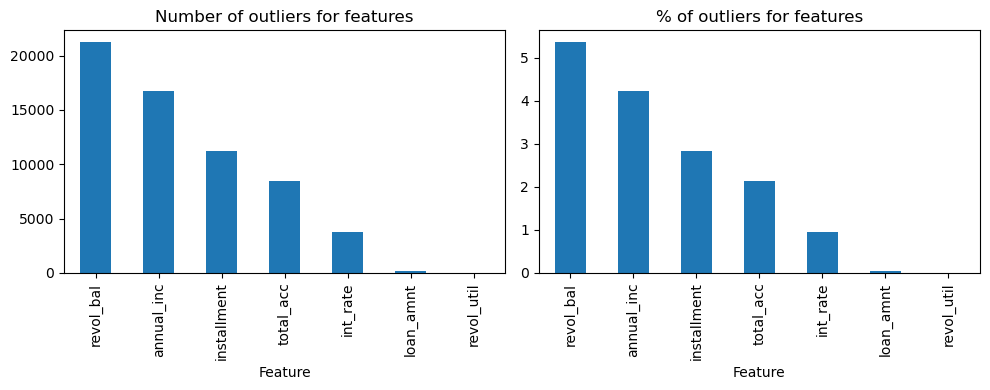

In [80]:
summary_df = detect_outliers_with_plots(df[numeric_features])
# Print the summary DataFrame
df_outliers = summary_df.sort_values(by='Num_Outliers', ascending=False).set_index('Feature')
print(df_outliers)

plt.figure(figsize=(10,4), tight_layout=True)
ax1 = plt.subplot(1, 2, 1)
df_outliers['Num_Outliers'].plot(kind='bar')
ax1.set_title('Number of outliers for features')

ax2 = plt.subplot(1, 2, 2)
df_outliers['Percentage_Outliers'].plot(kind='bar')
ax2.set_title('% of outliers for features')


### CAPPING 

In [100]:
for feature in numeric_features : cap_outliers_iqr(df, feature)


### After_Outliers_handling

Text(0.5, 1.0, 'Numberical featues after outliers handing ()')

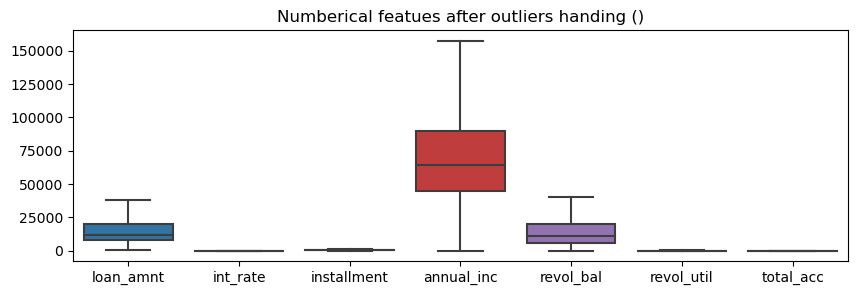

In [101]:
plt.figure(figsize=(10, 3))
sns.boxplot(df[numeric_features])
plt.title('Numberical featues after outliers handing ()')

### Label_Encoding

In [102]:
# categorical features

columns_to_encode = [
    'term', 
    'grade',
    'sub_grade', 
    'emp_title',
    'emp_length', 
    'home_ownership',
    'verification_status', 
    'issue_d', 
    'purpose', 
    'title',
    'open_acc', 
    'pub_rec',
    'initial_list_status', 
    'application_type',
    'mort_acc',
    'pub_rec_bankruptcies',
    'address', 
    'earliest_cr_line'
]

target_encoder = ce.TargetEncoder(cols=columns_to_encode)

In [84]:
# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
df['target_encoded'] = label_encoder.fit_transform(df[target_variable])
df['target_encoded'].head()

0    1
1    1
2    1
3    1
4    0
Name: target_encoded, dtype: int32

In [103]:
df_encoded = target_encoder.fit_transform(df[columns_to_encode],df['target_encoded'] )

In [105]:
df_encoded

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,open_acc,pub_rec,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,earliest_cr_line
0,0.842254,0.874270,0.861607,0.752809,0.804263,0.773378,0.853640,0.747971,0.810767,0.794991,0.796745,0.806845,0.799245,0.803913,0.773485,0.805058,1.0,0.847458
1,0.842254,0.874270,0.844963,0.666667,0.807615,0.830439,0.853640,0.747971,0.792586,0.770358,0.794801,0.806845,0.806940,0.803913,0.828248,0.805058,1.0,0.769937
2,0.842254,0.874270,0.876646,0.818182,0.793128,0.773378,0.785257,0.747971,0.832882,0.807194,0.798543,0.806845,0.806940,0.803913,0.773485,0.805058,1.0,0.780709
3,0.842254,0.937121,0.951814,1.000000,0.810806,0.773378,0.853640,0.753443,0.832882,0.807194,0.817758,0.806845,0.806940,0.803913,0.773485,0.805058,1.0,0.774317
4,0.680585,0.788191,0.754933,0.000000,0.799530,0.830439,0.776789,0.838881,0.832882,0.910420,0.798543,0.806845,0.806940,0.803913,0.813439,0.805058,0.0,0.807872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0.680585,0.874270,0.861607,1.000000,0.806738,0.773378,0.785257,0.782169,0.792586,0.770358,0.817758,0.806845,0.799245,0.803913,0.773485,0.805058,1.0,0.802266
396026,0.842254,0.788191,0.826304,0.779570,0.807813,0.830439,0.785257,0.744803,0.792586,0.770358,0.817758,0.806845,0.806940,0.803913,0.813439,0.805058,1.0,0.775693
396027,0.842254,0.874270,0.901418,0.731997,0.804263,0.773378,0.776789,0.844730,0.792586,0.793103,0.798467,0.806845,0.806940,0.803913,0.773485,0.805058,1.0,0.819110
396028,0.680585,0.788191,0.802480,1.000000,0.804263,0.830439,0.776789,0.833412,0.792586,1.000000,0.808750,0.806845,0.806940,0.803913,0.842915,0.805058,1.0,0.859813


In [106]:
# now all data is numberical type
df[columns_to_encode] = df_encoded[columns_to_encode]

In [107]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  float64
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [108]:
X = df.drop(columns=['loan_status', 'target_encoded'])
y = df['target_encoded']

In [109]:
X_tr_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_train_cv, test_size=0.25, random_state=4)


In [110]:
print(X.shape, y.shape)
print(X_tr_cv.shape, y_train_cv.shape, X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(396030, 26) (396030,)
(316824, 26) (316824,) (79206, 26) (79206,)
(237618, 26) (237618,) (79206, 26) (79206,)


### Scaling

In [111]:
scalar = StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scalar.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)


In [112]:
X_train_scaled.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,-1.289694,0.558960,0.441719,-1.295744,-0.900584,-0.642909,-0.520442,-2.642136,-0.390452,-1.121114,...,1.054140,0.372348,-0.904674,0.037051,-0.810572,0.814385,0.010171,-1.110067,0.286011,-2.023415
1,0.705094,0.558960,-0.675597,0.929082,0.690188,0.839014,0.746898,-1.068188,0.978314,2.160770,...,-0.464498,0.372348,0.974421,-0.192267,2.565747,0.814385,0.010171,1.486323,0.286011,0.496252
2,1.486836,-1.789035,2.550457,1.458062,-2.259532,-2.477717,-1.154111,0.095701,-1.118852,0.033963,...,1.054140,0.372348,1.620027,1.806073,-0.547482,-1.227920,0.010171,-1.110067,0.286011,0.496252
3,-0.492976,0.558960,1.089178,-0.267726,-0.900584,-0.800705,0.746898,1.704255,0.978314,-0.610598,...,-0.464498,0.372348,0.041692,0.962511,0.329484,0.814385,0.010171,0.365887,0.286011,0.496252
4,0.764998,0.558960,0.574359,1.226347,-0.150150,-0.371432,-0.644063,-0.739790,0.978314,-0.698115,...,-0.312524,0.372348,1.214375,0.696339,-0.196696,-1.227920,0.010171,-1.110067,0.286011,0.496252


## Model_building

In [113]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [125]:
# Calculate accuracy validations
y_pred  = logreg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("\nClassification Report (Validation Set):\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix (Validation Set):\n", confusion_matrix(y_val, y_pred))


Validation Accuracy: 99.95%

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15534
           1       1.00      1.00      1.00     63672

    accuracy                           1.00     79206
   macro avg       1.00      1.00      1.00     79206
weighted avg       1.00      1.00      1.00     79206


Confusion Matrix (Validation Set):
 [[15512    22]
 [   14 63658]]


In [126]:
y_pred  = logreg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred)


print("training  Accuracy: {:.2f}%".format(train_accuracy * 100))
print("\nClassification Report (training Set):\n", classification_report(y_train, y_pred))
print("\nConfusion Matrix (training Set):\n", confusion_matrix(y_train, y_pred))

training  Accuracy: 99.96%

Classification Report (training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46795
           1       1.00      1.00      1.00    190823

    accuracy                           1.00    237618
   macro avg       1.00      1.00      1.00    237618
weighted avg       1.00      1.00      1.00    237618


Confusion Matrix (training Set):
 [[ 46731     64]
 [    41 190782]]


In [127]:
y_pred  = logreg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)


print("test  Accuracy: {:.2f}%".format(test_accuracy * 100))
print("\nClassification Report (test Set):\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix (test Set):\n", confusion_matrix(y_test, y_pred))

test  Accuracy: 99.95%

Classification Report (test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15344
           1       1.00      1.00      1.00     63862

    accuracy                           1.00     79206
   macro avg       1.00      1.00      1.00     79206
weighted avg       1.00      1.00      1.00     79206


Confusion Matrix (test Set):
 [[15317    27]
 [   11 63851]]


In [120]:
def plot_auroc(fpr, tpr, typedata):
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {typedata}')
    plt.legend(loc="lower right")
    plt.show()

In [117]:
# Predict probabilities for the validation set
y_val_prob = logreg.predict_proba(X_val_scaled)[:, 1]
plot_auroc(y_val, y_val_prob, 'validation set')

ValueError: x is neither increasing nor decreasing : [1 1 0 ... 1 1 1].

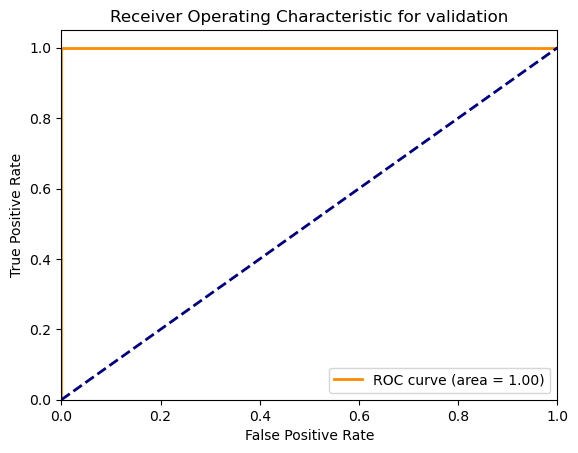

In [121]:
y_val_prob = logreg.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plot_auroc(fpr, tpr, 'validation')

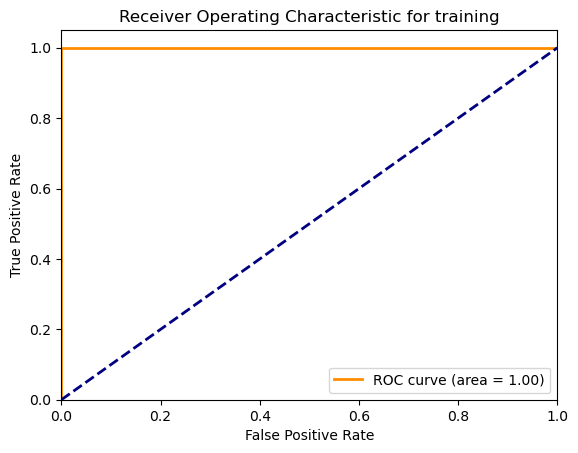

In [122]:
y_prob = logreg.predict_proba(X_train_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
plot_auroc(fpr, tpr, 'training')

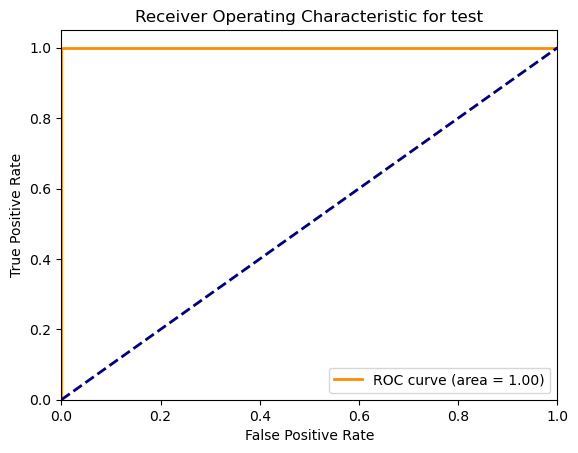

In [123]:
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plot_auroc(fpr, tpr, 'test')

In [124]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt